## Kernal Principal Component Analysis
This Keranl PCA implements the machine learning pipeline that includes Kernel Principal Component Analysis (kPCA) feature transformation, and classification. The dataset is handled for a specific concentric shapes in order to demonstrate advanced techniques in feature extraction and binary classification.

### Matthew Yeseta


In [1]:
import librosa 
import librosa as lb
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import librosa
import scipy.io
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat

In [2]:
def load_audio(file_path):
    return librosa.load(file_path, sr=None)

def load_mat(file_path):
    return scipy.io.loadmat(file_path)

def compute_argmax(t, psv):
    argmax_for1 = np.argmax(t[:,1]*psv[:,i])
    argmax_for0 = np.argmax(t[:,0]*psv[:,i])
    return argmax_for1, argmax_for0

def compute_B_prob_zero(i, B_prob, a1, a0):
    B_prob[1,i+1] = a1
    B_prob[0,i+1] = a0
    return B_prob

def compute_pv(p_prob, P_normalized_prob, T, P_bar_viterbi, P):
    epsilon = 1e-10 
    for i in range(P_normalized_prob.shape[1]-1):
        argmax_for1, argmax_for0 = compute_argmax(T, P_bar_viterbi)
        p_B_prob_norm_zero = compute_B_prob_zero(i, p_prob, argmax_for1, argmax_for0)
        r1 = T[argmax_for0,0]
        r2 = P_bar_viterbi[argmax_for0,i]
        r3 = P[0,i+1]
        P_bar_viterbi[0,i+1] = r1 * r2 * r3
        r1 = T[argmax_for1,0]
        r2 = P_bar_viterbi[argmax_for1,i]
        r3 = P[1,i+1]
        P_bar_viterbi[1,i+1] = r1 * r2 * r3
        P_bar_viterbi[:,i+1] = np.nan_to_num(P_bar_viterbi[:, i + 1])
        P_bar_viterbi[:,i+1] /= np.sum(P_bar_viterbi[:, i + 1]) 
    
    return P_bar_viterbi


### Kernal PCA

In [3]:
dir_path = 'C:\\Users\\matth\\Documents\\master-degree\\project\\HW4\\data'
os.chdir(dir_path)
dir_path = os.getcwd()

concentric = scipy.io.loadmat(os.path.join(dir_path, 'concentric.mat'))
concentricX = concentric['X']

This Kernal PCA is th setup a transformation to reduces dimensionality and create a higher dimensional space to allow linearly separeate the sata samples.

Interpretation: A cross-entropy loss of 1056.886 suggests that, on average, there's a significant divergence between the predicted probabilities and the actual class labels. 

This Keranl PCA implements the machine learning pipeline that includes Kernel Principal Component Analysis (kPCA) feature transformation, and classification. The dataset is handled for a specific concentric shapes in order to demonstrate advanced techniques in feature extraction and binary classification. 

Loading Data: 

Loads dataset named 'concentric.mat' using scipy.io.loadmat. This dataset holded the features of concentric shapes that shall be linearly separated.

Radial Basis Function (RBF) Kernel: 

The RBF kernel function, kernel_rbf, is defined to compute the similarity between pairs of data points. Our kernel has the following parameterized variable: gamma, which controls the spread of the Gaussian function. High gamma values may lead to localized influence or to a more narrower peaks. Lower gamma  values spread out the localozed influence more wider.
 
Building the Kernel Matrix: 
 
Our function build_kernel_matrix, does constructs the kernel matrix by applying the RBF kernel function to every pair of points in the dataset. This matrix represents a transformed feature space where data can be improved by linear separability.
 
Power Iteration for Eigenvectors and Eigenvalues: 
 
Two functions, build_power_eigenvectors_V0 and build_power_eigenvectors, are provided for computing the eigenvectors and eigenvalues of the kernel matrix using the power iteration method. This process is essential for kPCA, where these eigenvectors represent the principal components in the transformed feature space. The build_power_eigenvectors function appears more streamlined and corrects the deflation process to orthogonalize the eigenvectors.

Kernel PCA: 
 
By computing the kernel matrix with the RBF kernel and extracting its principal components (eigenvectors), the code performs kPCA. This step reduces dimensionality and potentially enhances the separability of the data based on non-linear features.

Implementing Kernel Principal Component Analysis (Kernel PCA) along with some additional machine learning operations like the perceptron model, backpropagation for training, and the Viterbi algorithm for sequence prediction


 Data Preparation Functions:

train_test_split_custom: 

Function to split the data into training and testing sets based on a given test size ratio.
generate_linearly_separable_data: Generates linearly separable data for testing purposes.

compute_predictions(): 
 
Fuction to calculates predictions using a logistic (sigmoid) function, given the input features, weights, and bias.

compute_loss():
 
Fuction to computes the logistic regression loss using binary cross-entropy, comparing the predicted values to the true target values.

compute_gradients(): 
 
Function to calculates the gradients of the loss with respect to weights and bias for gradient descent optimization.

sigmoid: 
 
The Sigmoid activation function commonly used in binary classification.

Backpropagation:
 
compute_backpropagation_simple and compute_backpropagation: 

Implemented backpropagation algorithm with stochastic gradient descent for optimizing the weights and biases of a neural network model. Performs backpropagation using mini-batches for training, updating weights and bias to minimize the loss

Developed an experimental "simple" compute_backpropagation_simple but utilized the compute_backpropagation for convergence analysis. "simple" is an iterative process to update weights and bias using the computed simple gradients.

Eigenvectors and Eigenvalues:

build_power_eigenvectors and eigenvectors_iteration: 

Two functions iteratively compute eigenvectors and eigenvalues that were used in side the Kernel PCA function to compute the principla components from teh Kernal PCA (Z).

Kernel PCA:

build_kernel_matrix, center_kernel_matrix, center_kernel_pca_matrix: Functions for building and centering the kernel matrix, which is central to Kernel PCA.
extract_eigenvectors: Extracts the principal components from the kernel matrix after it has been centered.
compute_kernel_pca_Z_ver1, compute_kernel_pca_Z_ver2, compute_kernel_pca_Vectors: Functions for computing the Kernel PCA transformation which project the data into a new feature space for dimensionality reduction.

compute_kernel_rbf: 
  
Fuction to computes the Radial Basis Function (RBF) kernel between two data points.

Viterbi Algorithm:
 
compute_backtrack_viterbi: 
Function to compute the most likely state sequence given a sequence of observations, using dynamic programming (Viterbi algorithm).

Perceptron Model:

perceptron_model: 
 
Funcation to trains a simple perceptron model, a single-layer neural network.

In [4]:
def train_test_split_custom(data, test_size=0.4):
    num_samples = data.shape[0]
    num_test_samples = int(num_samples * test_size)    
    shuffled_indices = np.random.permutation(num_samples)
    test_indices = shuffled_indices[:num_test_samples]
    train_indices = shuffled_indices[num_test_samples:]
    train_data = data[train_indices]
    test_data = data[test_indices]
    
    return train_data, test_data

def compute_predictions(X, w, b):
    return sigmoid(np.dot(X, w) + b)

def compute_loss(y, t):
    y_clipped = np.clip(y, 1e-9, 1 - 1e-9)
    return -np.mean(t * np.log(y_clipped) + (1 - t) * np.log(1 - y_clipped))

def compute_gradients(X, y, t):
    error = y - t
    grad_w = np.dot(X.T, error) / X.shape[0]
    grad_b = np.sum(error) / X.shape[0]
    return grad_w, grad_b

def compute_gradients_simple(X, y):
    X_shape_label = np.zeros(X.shape[1])
    #X_shape_label[51:] = 1
    grad_w = np.dot(X, (y - X_shape_label))
    grad_b = np.sum(y - X_shape_label)
    return grad_w, grad_b
    
def compute_backpropagation_simple(X, w, b, alpha, num_epochs, batch_size):
    initial_error = 0.5
    error = []
    for num_epochs in range(num_epochs):
        y = sigmoid(np.dot(w, X) + b)
        back_p_error = initial_error * np.mean((y - np.zeros(X.shape[1]) ** 2))
        error.append(back_p_error)
        grad_w, grad_b = compute_gradients_simple(X, y)
        w -= alpha * grad_w
        b -= alpha * grad_b
    return w, b, error

def compute_backpropagation(X, t, w, b, alpha, num_epochs, batch_size):
    loss_history = []
    num_samples = X.shape[1]
    num_batches = int(np.ceil(num_samples / batch_size))    
    for epoch in range(num_epochs):
        indices = np.random.permutation(num_samples)
        X_shuffled = X[:, indices]
        t_shuffled = t[indices]
        for i in range(num_batches):
            start = i * batch_size
            end = min(start + batch_size, num_samples)
            X_batch = X_shuffled[:, start:end]
            t_batch = t_shuffled[start:end]

            y = sigmoid(np.dot(w, X_batch) + b)
            loss = np.mean(0.5 * (y - t_batch) ** 2)
            loss_history.append(loss)

            grad_w, grad_b = compute_gradients(X_batch, y, t_batch)
            w -= alpha * grad_w
            b -= alpha * grad_b
        
        if epoch % 100 == 0:  # Print the loss every 100 epochs
            print(f"Epoch {epoch}, Loss: {loss_history[-1]}")
            
    return w, b, loss_history

def build_power_eigenvectors(X, number):
    vectors = []
    values = []
    for i in range(0, number):
        Y = np.random.rand(X.shape[0], 1)
        for j in range(0,1000):
            Y = np.dot(X, Y)
            Y = Y * (1/np.power(np.sum(np.power(Y,2)),0.5))
        value = np.power(np.sum(np.power(np.dot(Y.T, X), 2)), 0.5)
        values.append(value)
        vector = np.dot(X.T, Y) * (1/value)
        residual_vector = value * np.dot(Y, vector.T)
        X = X - residual_vector
        vectors.append(Y.reshape(-1,))
    vectors = np.array(vectors)
    return vectors.T, values


def eigenvectors_iteration(X, num_vectors):
    N = X.shape[0]
    vectors = np.zeros((N, num_vectors))
    values = []

    for i in range(num_vectors):
        Y = np.random.rand(N)
        for _ in range(1000):
            Y = np.dot(X, Y)
            Y /= np.linalg.norm(Y)
        value = np.dot(Y.T, np.dot(X, Y))
        vector = np.dot(X, Y)
        X -= value * np.outer(vector, vector)
        vectors[:, i] = vector
        values.append(value)
    
    return vectors, values


def generate_linearly_separable_data(n=100):
    X = np.random.randn(n, 3)
    weights = np.array([1, 2, 3])
    bias = -0.5
    y = np.dot(X, weights) + bias
    t = np.where(y > 0, 1, -1)  
    return X, t

def extract_eigenvectors(K, num_components):
    eigenvalues, eigenvectors = np.linalg.eigh(K)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors / np.sqrt(eigenvalues)
    return eigenvectors[:, :num_components], eigenvalues[:num_components]

def build_kernel_matrix(X, kernel_func):
    N = X.shape[1]
    kernel_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            kernel_matrix[i, j] = compute_kernel_rbf(X[:, i], X[:, j])
    return kernel_matrix

def center_kernel_matrix(K):
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K_centered

def center_kernel_pca_matrix(K, N):
    one_n = np.eye(N) - np.ones((N, N)) / N
    K_centered = np.dot(np.dot(one_n, K), one_n)
    return K_centered

def center_kernel_matrix(K):
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    return K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

def compute_kernel_pca_Z_ver1(X, gamma=15, num_components=3):
    N = X.shape[1]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = compute_kernel_rbf(X[:, i], X[:, j], gamma)
            
    K = center_kernel_pca_matrix(K, N)
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
    idx = eigenvalues.argsort()[::-1]
    vectors = eigenvectors[:, idx]
    Z = eigenvectors[:, num_components].T * K
    return Z

def compute_rbf_kernel(xi, xj):
    dist = np.sum(np.power((xi - xj), 2))
    return np.exp(-dist/0.01)

def compute_kernel_rbf(XData_1, XData_2, gamma=0.1):
    return np.exp(-gamma * np.linalg.norm(XData_1 - XData_2) ** 2)
    
def compute_kernel_pca_Z_ver2(X, gamma=15, num_components=3):
    N = X.shape[1]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = compute_kernel_rbf(X[:, i], X[:, j], gamma)
            
    K_centered = center_kernel_pca_matrix(K, N)
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
    idx = eigenvalues.argsort()[::-1]
    vectors = eigenvectors[:, idx[:num_components]]
    Z = np.dot(vectors.T, K_centered)  
    return Z
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def perceptron_model(Z, Y, alpha=0.01, iterations=1000):
    W = np.random.randn(3) * 0.01
    b = np.random.randn() * 0.01
    for i in range(iterations):
        Z_pred = sigmoid(np.dot(W, Z) + b)
        error = Z_pred - Y
        W -= alpha * np.dot(error, Z.T)
        b -= alpha * np.sum(error)
    return W, b

def load_data(file_path, file_name):
    os.chdir(file_path)
    data = loadmat(os.path.join(file_path, file_name))
    return data['X']

def compute_rbf_kernel(x1, x2, gamma=0.1):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

def compute_kernel_matrix(X, kernel_func):
    m = X.shape[1]
    K = np.zeros((m, m), dtype=np.complex128)
    for i in range(m):
        for j in range(m):
            K[i, j] = compute_rbf_kernel(X[:, i], X[:, j])
    return K

def compute_kernel_pca(X, n_components=3, gamma=0.1):
    K = compute_kernel_matrix(X, lambda x1, x2: compute_rbf_kernel(x1, x2, gamma))
    eig_vals, eig_vecs = np.linalg.eig(K)
    idx = eig_vals.argsort()[::-1]
    Z = eig_vecs[:, idx[:n_components]].T @ K
    return Z.real

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_perceptron_model(Z, labels, learning_rate, num_epochs):
    np.random.seed(95)
    w = np.random.randn(3)
    b = np.random.randn()
    errors = []

    for epoch in range(num_epochs):
        y = sigmoid(w @ Z + b)
        error = 0.5 * np.mean((y - labels)**2)
        errors.append(error)
        grad_w = Z @ (y - labels)
        grad_b = np.sum(y - labels)
        w -= learning_rate * grad_w.real
        b -= learning_rate * grad_b.real

    return w, b, errors

def send_error_convergence(errors, num_epochs):
    plt.figure(figsize=(9,8))
    plt.plot(range(num_epochs), errors)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.title('Perceptron Error Convergence')
    plt.show()

def send_2d_data(X, labels):
    plt.figure(figsize=(10,8))
    plt.scatter(X[0], X[1], c=labels, cmap='Spectral_r')
    plt.title('2D Data Before Transformation')
    plt.xlabel('X Axis Cluster Points')
    plt.ylabel('Y Axis Cluster Points')
    plt.show()

def send_3d_data(Z, labels):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Z[0], Z[1], Z[2], c=labels, cmap='Spectral_r')
    ax.set_title('3D Data Transformation via Kernel PCA')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    plt.show()


### Train model on Kernel PCA and Percetption model

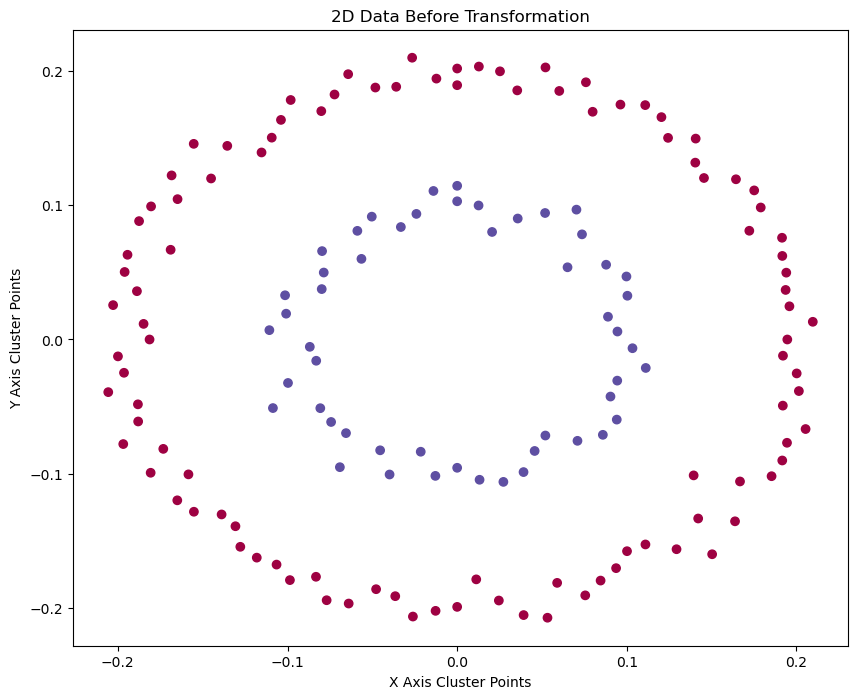

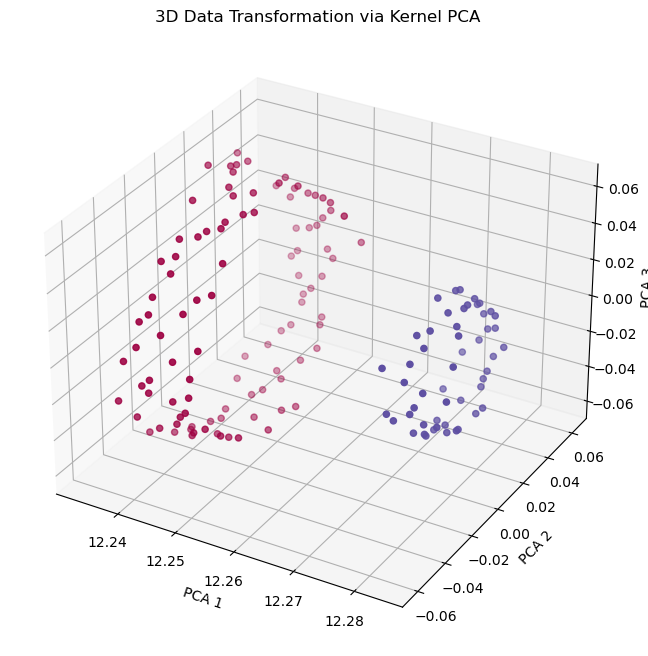

In [5]:
concentricX_train, concentricX_test = train_test_split_custom(concentricX, test_size=0.3) 


batch_size = 40
alpha=0.000001
iterations=10000
num_epochs = 4000
gamma=10

X = concentricX_train
Z = compute_kernel_pca(X, n_components=3)
labels = np.zeros(X.shape[1])
labels[51:] = 1


learning_rate = 0.000001
epochs=4000

w, b, errors = compute_perceptron_model(Z, labels, learning_rate, epochs)

send_2d_data(X, labels)
send_3d_data(Z, labels)


3D Scatter Plot of Transformed Features
 
The 3D scatter plot created with Matplotlib's Axes3D. It visualizes the transformed features from the first of three principal components obtained from kPCA in a three-dimensional space. This illuastrates the separation between data points in the new feature space created by kPCA. This plot is used for feature space visualization. 

The view of this data in not linearlay spearatble but with Kernal PCA and RBF we can separate the data. 

Now after running the  Kernal PCA  with RBF, this algorithm has transformned into a large, even, infinite degre of feature spaced and this kernal matrics is now the largest of the provided eigen vactors that were supplied within the Kernal PCA. 

Final Analysis:

3D Data Transformation via Kernal PCA

The 3D transformation with Kernal PCA has successfully separated into a linearly separable feature space and perceptton convergences.

There was several experiements on difference learning_rate, difference epochs, and different gamma. 

MSE Error: 0.11149986656501937 on epoch 4000, gamma 10, learning_rate 0.000001.

Success for a good convergence with a nice curve was reached in the ranges of learning_rate (0.000001, 0.00001), but was best at learning_rate (0.000001) For epochs started with (12,000) and reduced down to (4000) to demonstate that the convergence was reached at 700 and never servaced higher than 0.1114 on error rate.  For gamma, good ranges were (2.0, 2.1 and up to 10). 

  
2D Scatter Plot of Original Data
The first plot is a 2D scatter plot visualizing the original data points (concentricX) in their original feature space. This is the baseline comparison against the transformed feature space. There is not transformations applied and the data is clearly not linearly separable.



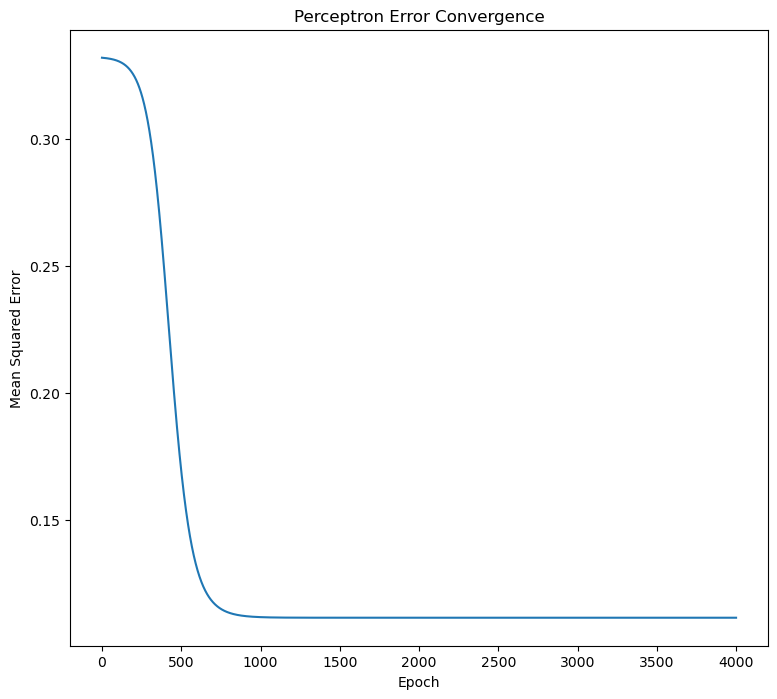

ValueError: x and y must have same first dimension, but have shapes (4000,) and (1,)

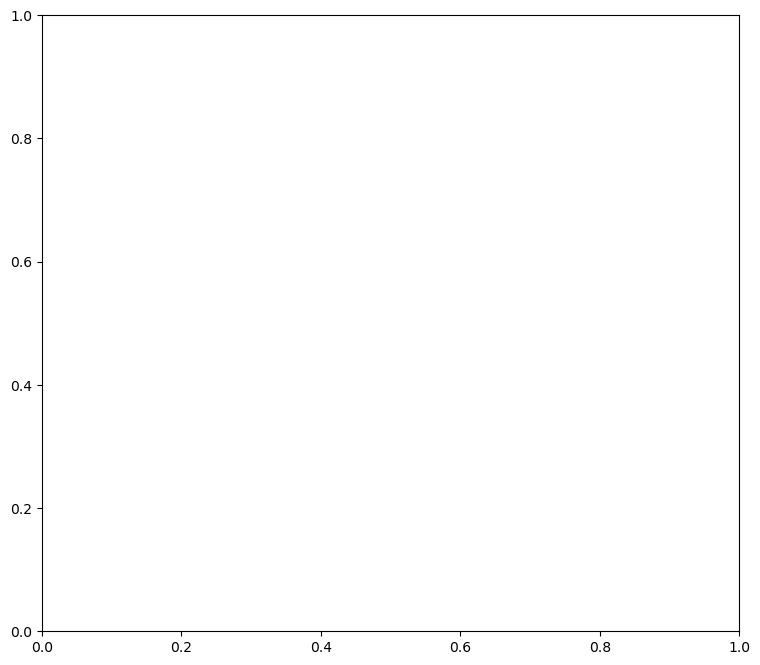

In [6]:

plt.figure(figsize=(9,8))
plt.plot(range(num_epochs), errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Perceptron Error Convergence')
plt.show()
    
convergence_mse = min(errors)
send_error_convergence(convergence_mse, epochs)
